In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/marketing_campaign.csv", sep = '\t')

### Bienvenidx!

El objetivo de analizar este dataset es identificar los multiple buyer personas que existen en el dataset. 

En la primera parte hare una limpieza de los datos
En la segunda hare un aislamiento y analisis de algunas variables
En la tercera parte empezare a relacionar las variables para encontrar más insights acerca de los BP

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)


# Clean data

## Paso 1.-

In [5]:
df.isnull().sum().head().sum()

24

In [6]:
### Quitar columnas que no sirven
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [7]:
### Los valores nulos venian de la columna income. Lo que hice fue rellenarlos con el valor mediano de la distribucion
df['Income']=df['Income'].fillna(df['Income'].median())

In [8]:
df.isnull().sum().head().sum()

0

In [9]:
df['Marital_Status'].unique()

# Creo que algunas variables sobran así que voy a reformar cada cosa

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'FreeUnion')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

Con esto hago una distincion importante. Separo en tres grupos: los casados, los solteros y los que tienen una relacion libre. 

In [11]:
df['Marital_Status'].unique()

array(['Single', 'FreeUnion', 'Married'], dtype=object)

In [12]:
### En este gran apartado solo estoy creando columnas producto de la suma de varias columnas. Con esto evito tanto dato.

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCMP'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [13]:
### Con esto creo un diccionario que despues elimino 
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [14]:
### Lo ultimo que quiero hacer es cambiar algunas variables de education
df['Education'] = df['Education'].replace(['2n Cycle','Graduation', ],'Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'UnderGraduate')

In [15]:
### Tiempo de ver el resultado
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCMP,NumPurchases
0,5524,1957,Graduate,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduate,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduate,FreeUnion,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduate,FreeUnion,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,0,1,422,0,19


# Data analysis

## Paso 2.- 

#### En esta parte toca categorizar y aislar variables. Con esto puedo entender mas sobre mi dataset así como el volumen de cada variable y sus diferentes observaciones dentro del dataset

- Variable categorica:
    - Education
    - Marital_Status
    - Kids
    - Complain
    - TotalAcceptedCMP

- Variables continuas:
    - Year_Birth
    - Income
    - Dt_Customer
    - Recency
    - Expenses
    - NumPurchases

Una vez identificado, me gustaria empezar a entender el volumen de cada variable.

Mi principal interes esta en:
- Education
- Marital_Status
- Kids
- Income
- Year_Birth

Con esta primera fase puedo darme cuenta de lo siguiente:
- Que grado de educacion tiene el cliente
- Cual es su situacion marital
- Cuantos hijos tienen
- Cuanto ganan
- Donde esta la distribucion de nuestros clientes

**Esto me permite crear una primera base para mi futuro esquema y con ello ir definiendo a mis buyer personas.**

In [16]:
(
df["Education"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str) + '%'
)

Graduate         59.4%
PhD              21.7%
Master           16.5%
UnderGraduate     2.4%
Name: Education, dtype: object

In [17]:
(
df["Marital_Status"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str) + '%'
)

Married      38.6%
Single       35.5%
FreeUnion    25.9%
Name: Marital_Status, dtype: object

In [18]:
(
df["Kids"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str) + '%'
)

1    50.4%
0    28.5%
2    18.8%
3     2.4%
Name: Kids, dtype: object

Text(0, 0.5, 'Acumulacion')

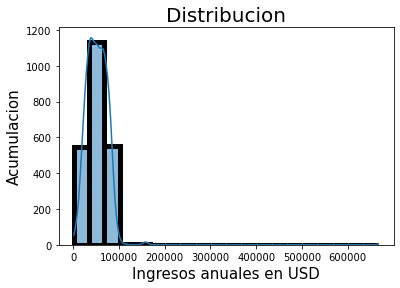

In [19]:
IncomeHist = sns.histplot(
            df, 
            x="Income",
            bins=20,
            linewidth=5, 
            kde = True)

IncomeHist.set_title("Distribucion", fontsize = 20)
IncomeHist.set_xlabel("Ingresos anuales en USD", fontsize = 15)
IncomeHist.set_ylabel("Acumulacion", fontsize = 15)

Text(0, 0.5, 'Acumulacion')

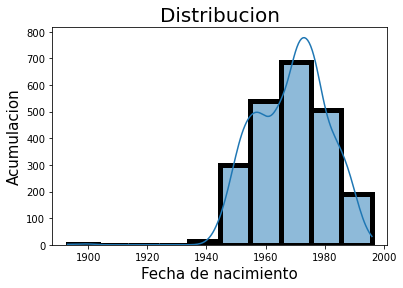

In [20]:
NacimientoHist = sns.histplot(
            df, 
            x="Year_Birth",
            bins=10,
            linewidth=5,
            kde = True)

NacimientoHist.set_title("Distribucion", fontsize = 20)
NacimientoHist.set_xlabel("Fecha de nacimiento", fontsize = 15)
NacimientoHist.set_ylabel("Acumulacion", fontsize = 15)

#### Relacion de variables.

Ahora que tengo un mayor contexto del dataset, mi siguiente paso es empezar a relacionar. Lo que quiero relacionar es esto:

- Variable categoricas y continuas que quiero relacionar
    - Education 
        - Kids °
        - Marital_Status °
        - TotalAcceptedCMP
        - Income
        - Expenses
        - NumPurchases
        - Recency
    - Marital Status
        - Expenses
        - Kids
        - TotalAcceptedCMP
        - NumPurchases
        - Recency
     - Kids
        - Expenses
        - TotalAcceptedCMP
        - NumPurchases
        - Recency
        
    - Marital_Status
    - Kids
    - Complain
    - TotalAcceptedCMP



In [76]:
meanEduKids = df.groupby(['Education'])['Kids'].mean()
meanEduKids

Education
Graduate         0.930827
Master           0.989189
PhD              1.000000
UnderGraduate    0.722222
Name: Kids, dtype: float64

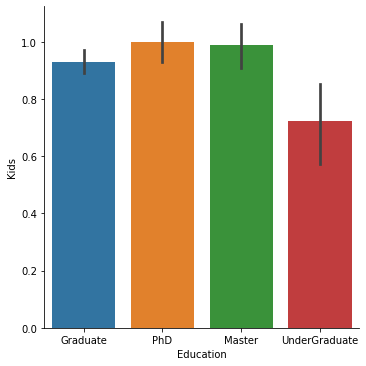

In [74]:
sns.catplot(x="Education", y="Kids", kind="bar", data=df)

In [85]:
??sns.catplot

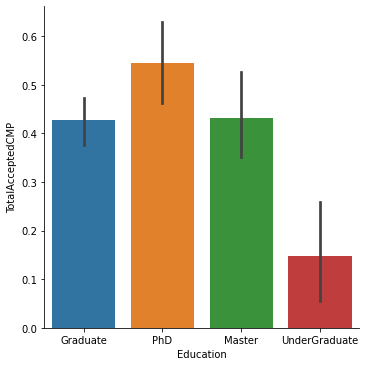

In [88]:
sns.catplot(x="Education", y="TotalAcceptedCMP", kind="bar", data=df)

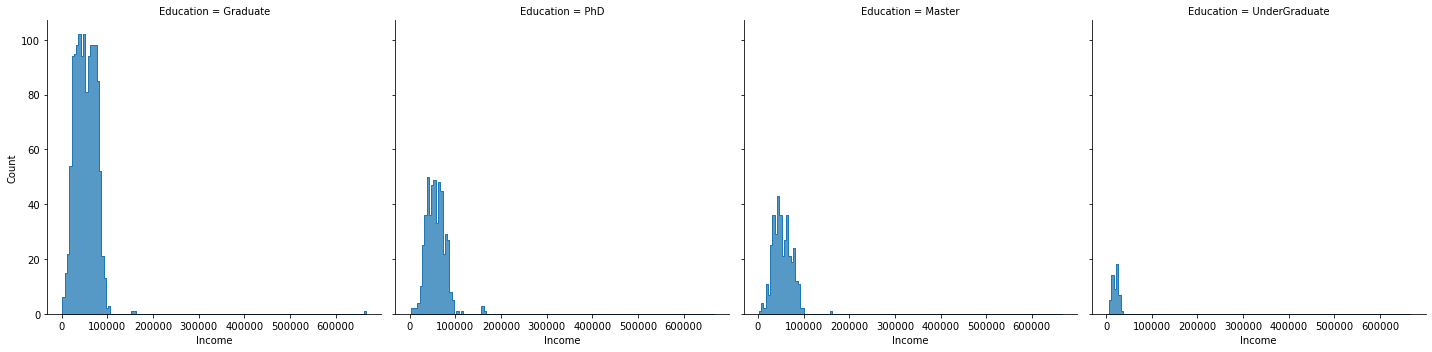

In [21]:
sns.displot(df, 
            x="Income", 
            col="Education", 
            element="step")

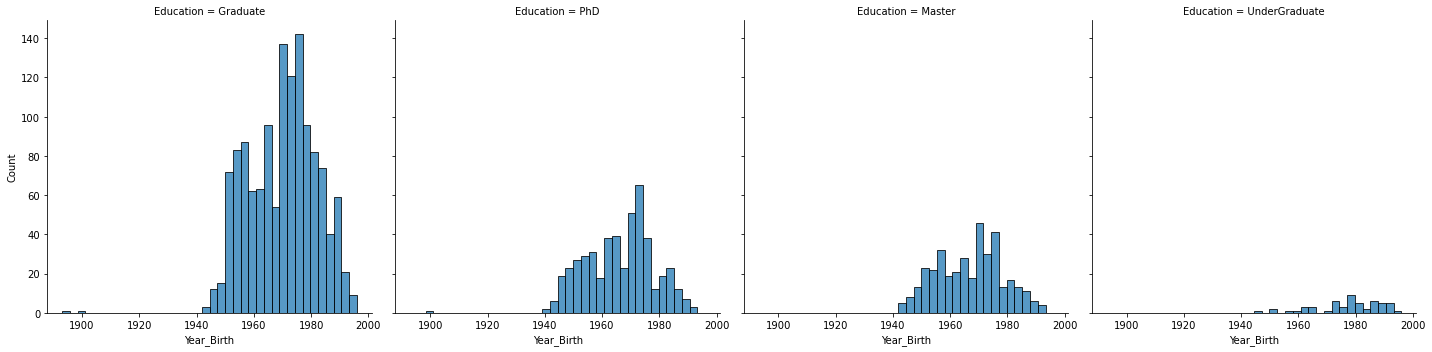

In [22]:
sns.displot(df,
           x="Year_Birth",
           col="Education")

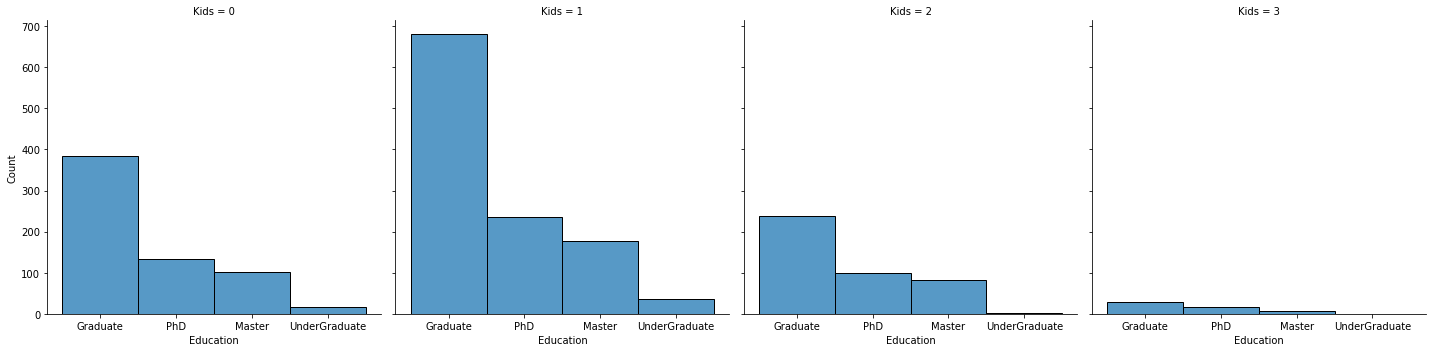

In [23]:
sns.displot(df,
           x="Education",
           col="Kids")

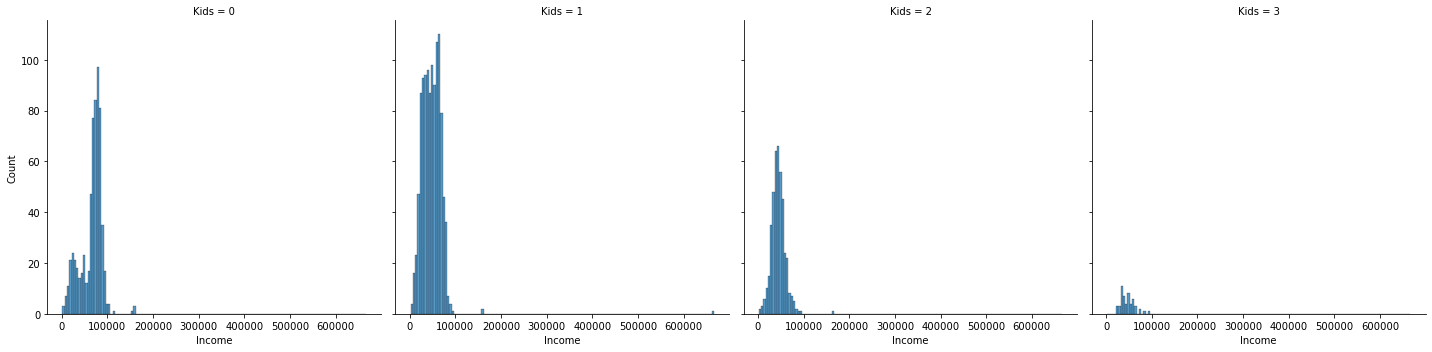

In [24]:
sns.displot(df,
           x="Income",
           col="Kids")

https://www.kaggle.com/imakash3011/customer-personality-analysis